# Applying Classification Algorithm on European Premier League

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTnal4m5Efvpq8I5iwG8XVpg6Dg2l-v3jtgEAt0in2cnAHPUsuK" align='center' width="2000" height="450"><br/>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)
3. [Loading Data](#section3)<br>
    - 3.1 [Description of the Dataset](#section301)<br>
    - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
    - 4.1 [Data Preprocessing](#section401)<br>
    - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
    - 5.1 [How many Home wins, Away wins and Draw matches in each season?](#section501)<br>
    - 5.2 [Analysis on the final result of all seasons](#section502)<br>
    - 5.3 [Which team has played maximum and minimum number of matches in European Premier League?](#section503)<br>
    - 5.4 [How the teams are scoring the goals as Home Team and Away Team?](#section504)<br>
         - 5.4.1 [Goal Analysis for Manchester United](#section50401)<br>
         - 5.4.2 [Goal Analysis for Arsenal](#section50402)<br>
    - 5.5 [How is Manchester United performing in every season?](#section505)<br>
    - 5.6 [How are the teams scoring in the League matches?](#section506)<br>
    - 5.7 [What is the distribution of Goal points by Home Team?](#section506)<br>
    - 5.8 [What is the distribution of Goal points by Away Team?](#section506)<br>


6. [Processing the Dataset to apply Machine Learning Algorithm](#section6)<br>
7. [Preparing X and y using Pandas](#section7)<br>
8. [Splitting X and y into training and test datsets](#section8)<br>
9. [LOGISTIC REGRESSION](#section9)<br>
    - 9.1 [Using the model for prediction](#section901)<br>
    - 9.2 [Model Evaluation](#section902)<br>
         - 9.2.1 [Model Evaluation using accuracy score](#section90201)<br>
         - 9.2.2 [Model Evaluation using confusion matrix](#section90202)<br>
10. [DECISION TREE](#section10)<br>
    - 10.1[Using the model for Prediction](#section1001)<br>
    - 10.2 [Model Evaluation](#section1002)<br>
        - 10.2.1 [Model Evaluation using accuracy score](#section100201)<br>
        - 10.2.2 [Model Evaluation using confusion matrix](#section100202)<br>
11. [RANDOM FOREST](#section11)<br>
    - 11.1[Using the model for Prediction](#section1101)<br>
    - 11.2 [Model Evaluation](#section1102)<br>
        - 11.2.1 [Model Evaluation using accuracy score](#section110201)<br>
        - 11.2.2 [Model Evaluation using confusion matrix](#section110202)<br>
12. [Random forest with RandomizedsearchCV](#section12)<br>
    - 12.1[Using the model for Prediction](#section1201)<br>
    - 12.2 [Model Evaluation](#section1202)<br>
        - 12.2.1 [Model Evaluation using accuracy score](#section120201)<br>
        - 12.2.2 [Model Evaluation using confusion matrix](#section120202)<br>
13. [Model comparison using accuracy score](#section13)<br>
14. [Conclusion](#section14)<br>

<a id=section1></a>
# 1. Problem Statement

**European Premier League** is the top level of the English Football League System.Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL).**Forty-nine clubs** have competed since the inception of the Premier League in 1992. Here, the goal is **predicting the Final result of the match** whether HomeTeam win or AwayTeam win or it will be a draw match.

<img src = 'https://statics.sportskeeda.com/editor/2018/11/9ccec-15418188187918-800.jpg' width="550" height="350">

<a id=section2></a>
# 2. Importing Packages

In [0]:
import numpy as np                                  # Implemennts milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [0]:
!pip install plotly --upgrade

     |████████████████████████████████| 7.3MB 8.3MB/s 
  Found existing installation: plotly 4.1.1
    Uninstalling plotly-4.1.1:
      Successfully uninstalled plotly-4.1.1


In [0]:
!pip install chart-studio

In [0]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [0]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

     |████████████████████████████████| 133kB 8.5MB/s 
     |████████████████████████████████| 614kB 18.5MB/s 
     |████████████████████████████████| 235kB 18.6MB/s 
     |████████████████████████████████| 307kB 33.5MB/s 
     |████████████████████████████████| 215kB 37.4MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 737kB 35.5MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=acf5735a1976c592ab18435f3a815f3e81013a362ab0927271ddacf66893c676
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=32288592028f14f3b5a93b9795c0203639db25be0e01a2a69520d7ebde8a9c3a
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created whee

In [0]:
import pandas_profiling

<a id=section3></a>
# 3. Loading Data

In this Classification algorithm, the data set used is **European Premier League**. 

This dataset contains information about **Home Team**, **Away Team**, **Full Time Home Goal**, **Full Time Away Goal**, **Full Time Resut**, **Half Time Home Goal**, **Half Time Away Goal**, **Half Time Result** and the **Date** and **Season** of the match played.

In [0]:
epl_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/European_Premier_League.csv')
epl_data

Div      Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0     E0  14/08/93  Arsenal      Coventry        0     3     A  NaN   NaN     
1     E0  14/08/93  Aston Villa  QPR             4     1     H  NaN   NaN     
2     E0  14/08/93  Chelsea      Blackburn       1     2     A  NaN   NaN     
3     E0  14/08/93  Liverpool    Sheffield Weds  2     0     H  NaN   NaN     
4     E0  14/08/93  Man City     Leeds           1     1     D  NaN   NaN     
...   ..       ...       ...       ...          ..    ..    ..   ..    ..     
9659  E0  13/05/18  Newcastle    Chelsea         3     0     H   1.0   0.0    
9660  E0  13/05/18  Southampton  Man City        0     1     A   0.0   0.0    
9661  E0  13/05/18  Swansea      Stoke           1     2     A   1.0   2.0    
9662  E0  13/05/18  Tottenham    Leicester       5     4     H   1.0   2.0    
9663  E0  13/05/18  West Ham     Everton         3     1     H   1.0   0.0    

      HTR   Season  
0     NaN  1993-94  
1     NaN  1993-94  
2     NaN  1993-94  
3     NaN  1993-94  
4     NaN  1993-94  
...   ...      ...  
9659  H    2017-18  
9660  D    2017-18  
9661  A    2017-18  
9662  A    2017-18  
9663  H    2017-18  

[9664 rows x 11 columns]

- The dataset comprises of __9664 observations of 11 columns__.

<a id=section301></a>
## 3.1 Description of the Dataset


| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Div           | League Division                                           | 
| Date          | Date of the match (DD/MM/YY)                              |  
| HomeTeam      | Name of team playing in home ground                       | 
| AwayTeam      | Name of team playing in away ground                       |   
| FTHG          | Full Time Home team goals at the end of match                       |
| FTAG          | Full Time Away team goals at the end of match                       |
| FTR        | Full Time Match results (H:home team win, A:away team win,D:draw)|
| HTHG          | Half Time HomeTeam Goal                                   |
| HTHG          | Half Time AwayTeam Goal                                   |
| HTR        | Half Time Match results (H:home team win, A:away team win, D:draw|
| Season        | Year of the match played                                  |



In [0]:
epl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
Div         9664 non-null object
Date        9664 non-null object
HomeTeam    9664 non-null object
AwayTeam    9664 non-null object
FTHG        9664 non-null int64
FTAG        9664 non-null int64
FTR         9664 non-null object
HTHG        8740 non-null float64
HTAG        8740 non-null float64
HTR         8740 non-null object
Season      9664 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


- ```info``` function gives us the following insights into the epl_data dataframe:

  - There are a total of **9964 samples (rows)** and **11 columns** in the dataframe.
  
  - There are **4 columns** with a **numeric** datatype and **7 columns** with an **object** datatype.
  
  - There are missing values in the dataset in the column **HTHG**, **HTAG**, **HTR**

In [0]:
epl_data.shape      # Gives the No.of Rows to Columns in iur dataset 

(9664, 11)

European Premier League has __9664 rows__ and __11 columns.__

In [0]:
epl_data.columns             # Displays the columns 

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Season'],
      dtype='object')

In [0]:
epl_data.head()              # Displays the first five rows in our dataset

Div      Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  HTR  \
0  E0  14/08/93  Arsenal      Coventry        0     3     A  NaN   NaN    NaN   
1  E0  14/08/93  Aston Villa  QPR             4     1     H  NaN   NaN    NaN   
2  E0  14/08/93  Chelsea      Blackburn       1     2     A  NaN   NaN    NaN   
3  E0  14/08/93  Liverpool    Sheffield Weds  2     0     H  NaN   NaN    NaN   
4  E0  14/08/93  Man City     Leeds           1     1     D  NaN   NaN    NaN   

    Season  
0  1993-94  
1  1993-94  
2  1993-94  
3  1993-94  
4  1993-94

In [0]:
epl_data.tail()

Div      Date     HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
9659  E0  13/05/18  Newcastle    Chelsea    3     0     H   1.0   0.0   H    
9660  E0  13/05/18  Southampton  Man City   0     1     A   0.0   0.0   D    
9661  E0  13/05/18  Swansea      Stoke      1     2     A   1.0   2.0   A    
9662  E0  13/05/18  Tottenham    Leicester  5     4     H   1.0   2.0   A    
9663  E0  13/05/18  West Ham     Everton    3     1     H   1.0   0.0   H    

       Season  
9659  2017-18  
9660  2017-18  
9661  2017-18  
9662  2017-18  
9663  2017-18

In [0]:
epl_data['HomeTeam'].unique()       # Displays the teamname that played as HomeTeam

array(['Arsenal', 'Aston Villa', 'Chelsea', 'Liverpool', 'Man City',
       'Newcastle', 'Oldham', 'Sheffield United', 'Southampton',
       'West Ham', 'Norwich', 'Tottenham', 'Everton', 'Ipswich', 'Leeds',
       'Wimbledon', 'Blackburn', 'Coventry', 'Man United', 'QPR',
       'Sheffield Weds', 'Swindon', 'Crystal Palace', 'Leicester',
       "Nott'm Forest", 'Bolton', 'Middlesbrough', 'Derby', 'Sunderland',
       'Barnsley', 'Charlton', 'Watford', 'Bradford', 'Fulham',
       'Birmingham', 'Middlesboro', 'West Brom', 'Portsmouth', 'Wolves',
       'Wigan', 'Reading', 'Hull', 'Stoke', 'Burnley', 'Blackpool',
       'Swansea', 'Cardiff', 'Bournemouth', 'Brighton', 'Huddersfield'],
      dtype=object)

**epl_data['HomeTeam'].unique()** gives the list of teams played as HomeTeam in EPL.

In [0]:
epl_data.describe(include = 'all')       # Gives the statistical information of our Dataset

Div      Date    HomeTeam    AwayTeam         FTHG         FTAG  \
count   9664  9664      9664        9664        9664.000000  9664.000000   
unique  1     2572      50          50         NaN          NaN            
top     E0    1/1/1994  Man United  Man United NaN          NaN            
freq    9664  11        479         479        NaN          NaN            
mean    NaN   NaN       NaN         NaN         1.523903     1.121482      
std     NaN   NaN       NaN         NaN         1.301671     1.121667      
min     NaN   NaN       NaN         NaN         0.000000     0.000000      
25%     NaN   NaN       NaN         NaN         1.000000     0.000000      
50%     NaN   NaN       NaN         NaN         1.000000     1.000000      
75%     NaN   NaN       NaN         NaN         2.000000     2.000000      
max     NaN   NaN       NaN         NaN         9.000000     8.000000      

         FTR         HTHG         HTAG   HTR   Season  
count   9664  8740.000000  8740.000000  8740  9664     
unique  3    NaN          NaN           3     25       
top     H    NaN          NaN           D     1993-94  
freq    4461 NaN          NaN           3679  462      
mean    NaN   0.685469     0.488444     NaN   NaN      
std     NaN   0.833581     0.710524     NaN   NaN      
min     NaN   0.000000     0.000000     NaN   NaN      
25%     NaN   0.000000     0.000000     NaN   NaN      
50%     NaN   0.000000     0.000000     NaN   NaN      
75%     NaN   1.000000     1.000000     NaN   NaN      
max     NaN   5.000000     5.000000     NaN   NaN

- ```describe``` function gives us the following insights into the data:
    
   - The distribution of **FTHG** and **FTAG** is **positive (right) skewed** because the **mean** of **FTHG (1.5239)** and **FTAG(1.1214) lies to the right** of the **median(50%)** value **(1.0000)**, on a **distribution plot**. 

In [0]:
epl_data.isnull().sum()          # To check if there is any null values in the dataset

Div         0  
Date        0  
HomeTeam    0  
AwayTeam    0  
FTHG        0  
FTAG        0  
FTR         0  
HTHG        924
HTAG        924
HTR         924
Season      0  
dtype: int64

From the above output we can see that __HTHG__ , __HTAG__ and __HTR__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>
## 3.2 Pandas Profiling before Data Preprocessing

In [0]:
epl_data.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 11
- Number of observations: 9664
- Missing cells: 2772 (2.6%)
- Duplicate Rows: 0(0.0%)

__Variables types__: 
- Numeric = 4
- Categorical = 6
- Text (Unique) = 0
- Rejected = 1

<br>


- **Div** has **constant value "E0"**.
- **HTAG** has **924 (9.6%) missing values**.
- **HTHG** has **924 (9.6%) missing values**.
- **HTR** has **924 (9.6%) missing values**.


- **FTAG** has a **skewness** of **1.08319** and **kurtosis** of **1.26496**.

  - The distribution is **positive (right) skewed** as the **mean (1.12148)** is to the **right** of the **median (1)**.
  
  - **95%** samples have a **FTAG** as **3**.
  
- **FTHG** has a **skewness** of **0.99020** and **kurtosis** of **1.32073**.

   - The distribution is **positive (right) skewed** as the **mean (1.52390)** is to the **right** of the **median (1)**.
  
   - **95%** samples have a **FTHG** as **4**.
   
 - **FTR** has **Distinct Count as 3**.
 
  

<a id=section4></a>
# 4. Data Preprocessing

<a id=section401></a>
## 4.1 Data Preprocessing

Inorder to replace the missing values in the column __HTHG__, __HTAG__ and __HTR__, the fillna() is used to replace __HTHG__ and __HTAG__ by '0' and __HTR__ by 'D'. This is done because the result cannot be predicted as which team would have won the match in the First half.

In [0]:
epl_data['HTHG'].fillna(0.0,inplace = True) 
epl_data['HTAG'].fillna(0.0,inplace = True)  
epl_data['HTR'].fillna('D',inplace = True) 
epl_data.head(940)

Div      Date       HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0    E0  14/08/93  Arsenal        Coventry        0     3     A   0.0   0.0    
1    E0  14/08/93  Aston Villa    QPR             4     1     H   0.0   0.0    
2    E0  14/08/93  Chelsea        Blackburn       1     2     A   0.0   0.0    
3    E0  14/08/93  Liverpool      Sheffield Weds  2     0     H   0.0   0.0    
4    E0  14/08/93  Man City       Leeds           1     1     D   0.0   0.0    
..   ..       ...       ...         ...          ..    ..    ..   ...   ...    
935  E0  22/08/95  Bolton         Newcastle       1     3     A   0.0   1.0    
936  E0  23/08/95  Coventry       Man City        2     1     H   1.0   0.0    
937  E0  23/08/95  Everton        Arsenal         0     2     A   0.0   0.0    
938  E0  23/08/95  Man United     West Ham        2     1     H   0.0   0.0    
939  E0  23/08/95  Nott'm Forest  Chelsea         0     0     D   0.0   0.0    

    HTR   Season  
0    D   1993-94  
1    D   1993-94  
2    D   1993-94  
3    D   1993-94  
4    D   1993-94  
..  ..       ...  
935  A   1995-96  
936  H   1995-96  
937  D   1995-96  
938  D   1995-96  
939  D   1995-96  

[940 rows x 11 columns]

__Div__ has constant value __'E0'__.So, weare dropping this column.


In [0]:
epl_data.drop(['Div'], axis = 1 ,inplace= True)
epl_data

Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0     14/08/93  Arsenal      Coventry        0     3     A   0.0   0.0   D    
1     14/08/93  Aston Villa  QPR             4     1     H   0.0   0.0   D    
2     14/08/93  Chelsea      Blackburn       1     2     A   0.0   0.0   D    
3     14/08/93  Liverpool    Sheffield Weds  2     0     H   0.0   0.0   D    
4     14/08/93  Man City     Leeds           1     1     D   0.0   0.0   D    
...        ...       ...       ...          ..    ..    ..   ...   ...  ..    
9659  13/05/18  Newcastle    Chelsea         3     0     H   1.0   0.0   H    
9660  13/05/18  Southampton  Man City        0     1     A   0.0   0.0   D    
9661  13/05/18  Swansea      Stoke           1     2     A   1.0   2.0   A    
9662  13/05/18  Tottenham    Leicester       5     4     H   1.0   2.0   A    
9663  13/05/18  West Ham     Everton         3     1     H   1.0   0.0   H    

       Season  
0     1993-94  
1     1993-94  
2     1993-94  
3     1993-94  
4     1993-94  
...       ...  
9659  2017-18  
9660  2017-18  
9661  2017-18  
9662  2017-18  
9663  2017-18  

[9664 rows x 10 columns]

Goal points cannt be a float value. Here we are converting the __'HTHG'__ and __'HTAG'__ to whole number.

In [0]:
epl_data['HTHG'] = epl_data['HTHG'].apply(np.floor).astype(int)
epl_data['HTAG'] = epl_data['HTAG'].apply(np.floor).astype(int)
epl_data

Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0     14/08/93  Arsenal      Coventry        0     3     A   0     0     D    
1     14/08/93  Aston Villa  QPR             4     1     H   0     0     D    
2     14/08/93  Chelsea      Blackburn       1     2     A   0     0     D    
3     14/08/93  Liverpool    Sheffield Weds  2     0     H   0     0     D    
4     14/08/93  Man City     Leeds           1     1     D   0     0     D    
...        ...       ...       ...          ..    ..    ..  ..    ..    ..    
9659  13/05/18  Newcastle    Chelsea         3     0     H   1     0     H    
9660  13/05/18  Southampton  Man City        0     1     A   0     0     D    
9661  13/05/18  Swansea      Stoke           1     2     A   1     2     A    
9662  13/05/18  Tottenham    Leicester       5     4     H   1     2     A    
9663  13/05/18  West Ham     Everton         3     1     H   1     0     H    

       Season  
0     1993-94  
1     1993-94  
2     1993-94  
3     1993-94  
4     1993-94  
...       ...  
9659  2017-18  
9660  2017-18  
9661  2017-18  
9662  2017-18  
9663  2017-18  

[9664 rows x 10 columns]

<a id=section402></a>
## 4.2 Pandas Profiling after Data Preprocessing

In [0]:
epl_data.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 10
- Number of observations: 9664
- Missing cells: 0 (0.0%)

__Variables types__: 
- Numeric = 4
- Categorical = 6
- Text (Unique) = 0
- Rejected = 0

<a id=section5></a>
# 5. Exploratory Data Analysis

<a id=section50101></a>
## 5.1 How many Home wins, Away wins and Draw matches in each season?

Text(0.5, 1.0, 'Season wise Full Time Result')

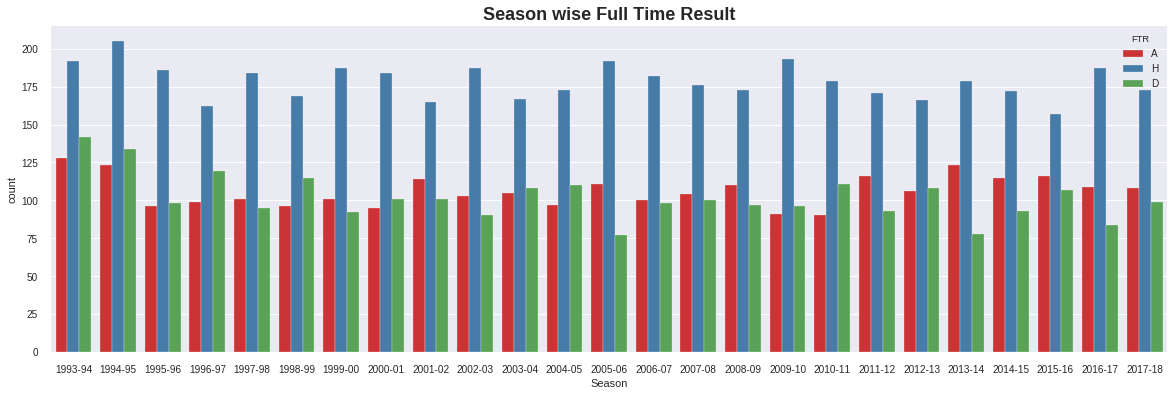

In [0]:
fig,ax =plt.subplots(figsize=(20,6))                                     # for plotting
sns.countplot(data = epl_data,x = 'Season', hue='FTR',palette='Set1')
plt.title('Season wise Full Time Result',fontsize=18,fontweight="bold")

- In all the seasons there is **huge difference between the Full Time Results of Home Team and Away Team**.

- There is **high chance of HomeTeam winning the game** than the AwayTeam.

- In the season 1994-95 the total of Home Team wins exceeds  above 200.

<a id=section50101></a>
## 5.2 Analysis on the final result of all seasons

In [0]:
ftr_count = epl_data['FTR'].value_counts()          #  To count the number of Home win, Away win and Draw matches
ftr_count

H    4461
A    2657
D    2546
Name: FTR, dtype: int64

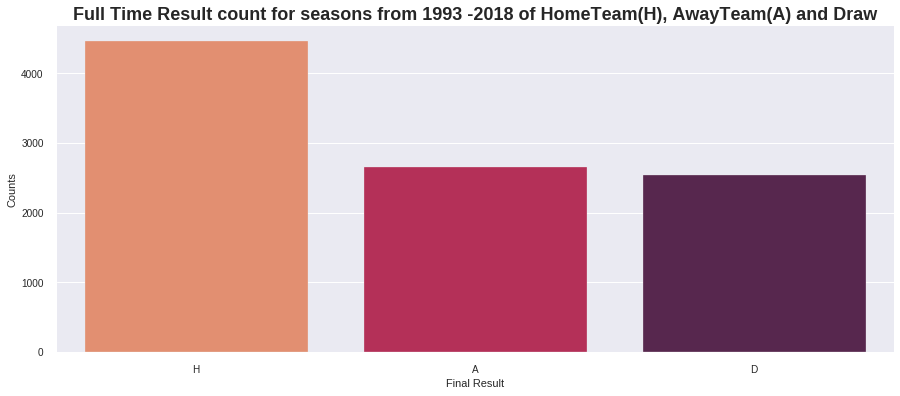

In [0]:
plt.figure(figsize=(15,6))
sns.countplot('FTR',data = epl_data, order = epl_data['FTR'].value_counts().index,palette="rocket_r")
plt.title("Full Time Result count for seasons from 1993 -2018 of HomeTeam(H), AwayTeam(A) and Draw",fontsize=18,fontweight="bold")
plt.xlabel('Final Result')
plt.ylabel('Counts')
plt.show()

- **Final result** like **Home win(H), Away win(A) and Draw(D)** is analysed in all seasons.

- When comparing H and A, the **total count** of **Home team win(H)** is **more** than the count of Away team win(A)

<a id=section50101></a>
## 5.3 Which team has played maximum and minimum number of matches in European Premier League?

In [0]:
epl_data['HomeTeam'].value_counts()                 # To count the No.of matches played by the team as Home Team

Man United          479
Tottenham           479
Arsenal             479
Everton             479
Liverpool           479
Chelsea             479
Aston Villa         441
Newcastle           441
West Ham            422
Man City            384
Southampton         346
Blackburn           327
Sunderland          304
Bolton              247
Fulham              247
Middlesbrough       247
Leicester           230
West Brom           228
Leeds               213
Stoke               190
Coventry            156
Crystal Palace      154
Charlton            152
Wigan               152
Wimbledon           137
Norwich             137
Sheffield Weds      137
Birmingham          133
Portsmouth          133
Derby               133
Swansea             133
QPR                 118
Watford             95 
Hull                95 
Ipswich             80 
Nott'm Forest       78 
Wolves              76 
Burnley             76 
Bournemouth         57 
Reading             57 
Sheffield United    40 
Bradford        

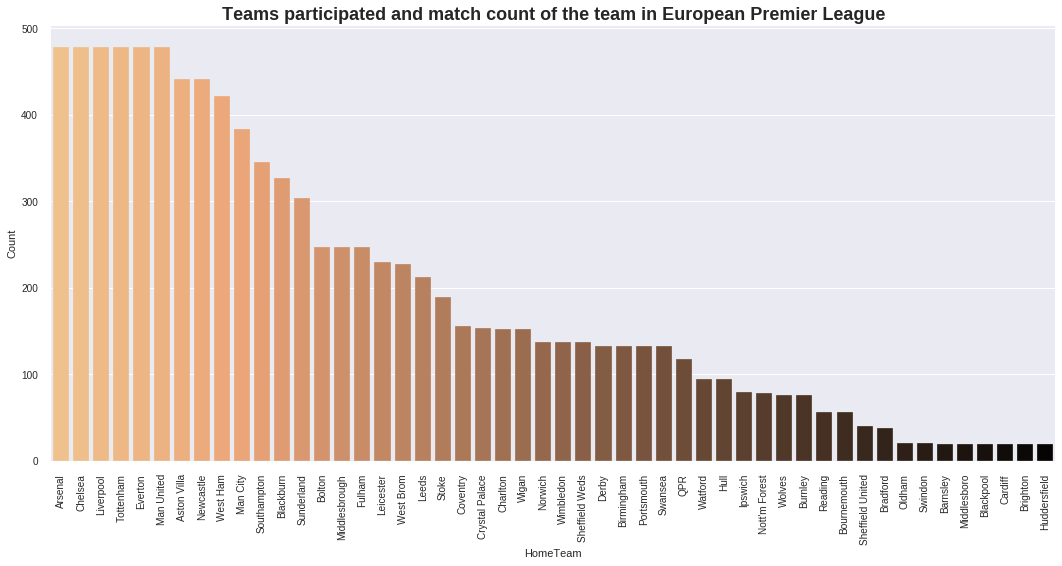

In [0]:
from collections import Counter
team_count = Counter(epl_data['HomeTeam'].dropna().tolist()).most_common(50)
team_idx = [HomeTeam[0] for HomeTeam in team_count]
team_val = [HomeTeam[1] for HomeTeam in team_count]
fig,ax = plt.subplots(figsize=(18,8))
sns.barplot(x = team_idx,y=team_val ,ax =ax,palette='copper_r')
plt.title('Teams participated and match count of the team in European Premier League',fontsize=18,fontweight="bold")
plt.xlabel('HomeTeam')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

- **Arsenal, Chelsea, Liverpool, Tottenham, Everton, Man United** teams has played **479 matches** which is more compared to other teams.

- **Middlesboro, Huddersfield, Cardiff, Brighton, Barnsley, Blackpool** teams has played the least number of matches which is **19 matches**.

<a id=section50101></a>
## 5.4 How the teams are scoring the goals as Home Team and Away Team?

### 5.4.1 Goal Analysis for Manchester United

   FTR
H  349
D  83 
A  47 


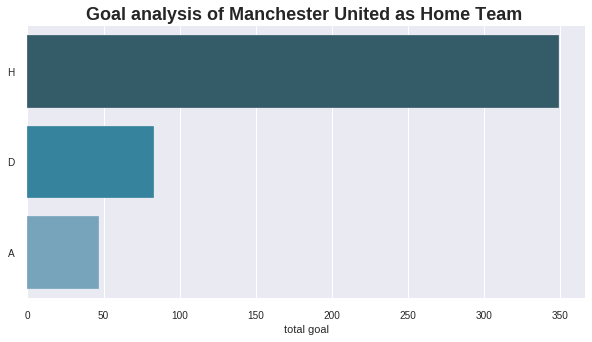

In [0]:
manunited_team_home = epl_data.loc[epl_data['HomeTeam'] == 'Man United']
manunited_result_count = manunited_team_home['FTR'].value_counts().to_frame()
print(manunited_result_count)
plt.figure(figsize=(10,5))
sns.barplot(manunited_result_count['FTR'],manunited_result_count.index,palette="PuBuGn_d")
plt.title("Goal analysis of Manchester United as Home Team ",fontsize=18,fontweight="bold")
plt.xlabel('total goal')
plt.show() 

- When **Manchester United** plays as **Home Team** there is **high possibility to Manchester United to win the game**, as the team is good in scoring the goals.

- Only **less chances** are there for the **Away Team** to win which plays with Manchester United.

   FTR
A  256
D  120
H  103


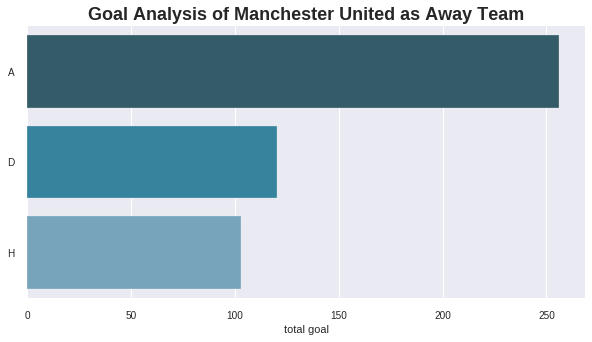

In [0]:
manunited_team_away = epl_data.loc[epl_data['AwayTeam'] == 'Man United']
manunited_result_count = manunited_team_away['FTR'].value_counts().to_frame()
print(manunited_result_count)
plt.figure(figsize=(10,5))
sns.barplot(manunited_result_count['FTR'],manunited_result_count.index,palette="PuBuGn_d")
plt.title("Goal Analysis of Manchester United as Away Team",fontsize=18,fontweight="bold")
plt.xlabel('total goal')
plt.show() 

- When **Manchester United** plays as AwayTeam,it has **good scope for winning the match**.

- **HomeTeam** have **less possiblities to win** the match when Manchester United plays as Away Team.

### 5.4.2 Goal Analysis for Arsenal

   FTR
H  315
D  110
A  54 


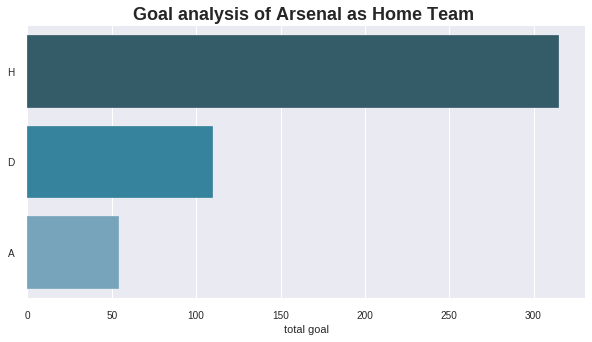

In [0]:
arsenal_team_home = epl_data.loc[epl_data['HomeTeam'] == 'Arsenal']
arsenal_result_count = arsenal_team_home['FTR'].value_counts().to_frame()
print(arsenal_result_count)
plt.figure(figsize=(10,5))
sns.barplot(arsenal_result_count['FTR'],arsenal_result_count.index,palette="PuBuGn_d")
plt.title("Goal analysis of Arsenal as Home Team ",fontsize=18,fontweight="bold")
plt.xlabel('total goal')
plt.show()

- If **Arsenal** plays as HomeTeam, it has **high possibility to win the match**.
- **Less possibility** of **Away Team** to win the match if Arsenal plays as HomeTeam.

   FTR
A  214
H  133
D  132


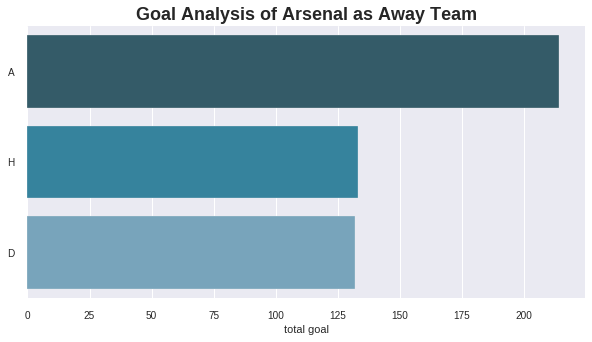

In [0]:
arsenal_team_away = epl_data.loc[epl_data['AwayTeam'] == 'Arsenal']
arsenal_result_count = arsenal_team_away['FTR'].value_counts().to_frame()
print(arsenal_result_count)
plt.figure(figsize=(10,5))
sns.barplot(arsenal_result_count['FTR'],arsenal_result_count.index,palette="PuBuGn_d")
plt.title("Goal Analysis of Arsenal as Away Team",fontsize=18,fontweight="bold")
plt.xlabel('total goal')
plt.show() 

- **High chance**s for **Arsenal** to win the match if the team plays as **AwayTeam**.

- There is **equal chances** for the match to become **Draw or the match to win by HomeTeam**.

<a id=section50101></a>
## 5.5 How is Manchester United performing in every season?

In [0]:
df_team = epl_data[epl_data['HomeTeam'] == 'Man United']            # To extract Man United team that which played as Home Team               
df_team.head()

Date    HomeTeam          AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
18  18/08/93  Man United  Sheffield United  3     0     H   0     0     D    
27  21/08/93  Man United  Newcastle         1     1     D   0     0     D    
61  1/9/1993  Man United  West Ham          3     0     H   0     0     D    
86  19/09/93  Man United  Arsenal           1     0     H   0     0     D    
93  25/09/93  Man United  Swindon           4     2     H   0     0     D    

     Season  
18  1993-94  
27  1993-94  
61  1993-94  
86  1993-94  
93  1993-94

In [0]:
season = epl_data['Season'].unique()                 # To extract the EPL Seasons
season

array(['1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99',
       '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18'], dtype=object)

In [0]:
# Counting the No.of Matches played in each season by Man United as Home Team
seasonCount_home = {i:epl_data[(epl_data['Season'] == i) & (epl_data['HomeTeam'] == 'Man United')]['FTHG'].sum() for i in season}

In [0]:
seasonCount_home

{'1993-94': 39,
 '1994-95': 42,
 '1995-96': 36,
 '1996-97': 38,
 '1997-98': 42,
 '1998-99': 45,
 '1999-00': 59,
 '2000-01': 49,
 '2001-02': 40,
 '2002-03': 42,
 '2003-04': 37,
 '2004-05': 31,
 '2005-06': 37,
 '2006-07': 46,
 '2007-08': 47,
 '2008-09': 43,
 '2009-10': 52,
 '2010-11': 49,
 '2011-12': 52,
 '2012-13': 45,
 '2013-14': 29,
 '2014-15': 41,
 '2015-16': 27,
 '2016-17': 26,
 '2017-18': 38}

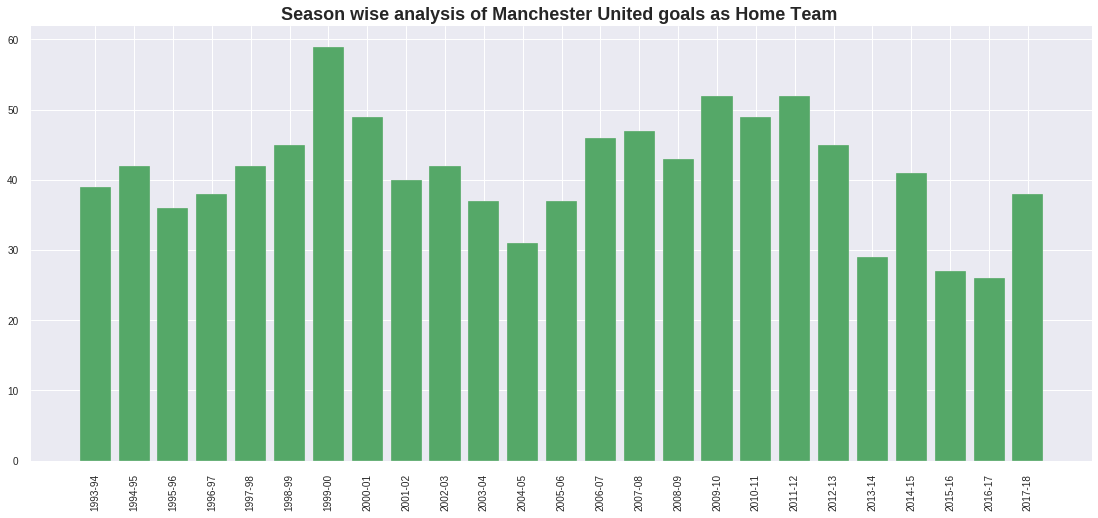

In [0]:
year = list(seasonCount_home.keys())
total_goal = list(seasonCount_home.values())
plt.figure(figsize=(19,8))
plt.bar(range(len(seasonCount_home)),total_goal,tick_label=year,color ='g')
plt.title("Season wise analysis of Manchester United goals as Home Team ",fontsize=18,fontweight="bold")
plt.xticks(rotation = 90)
plt.savefig('seashomegoal.png')
plt.show()

- **Average** goal score is **41.28** .

- Manchester United performs good in all the season.

- It has scored above 30 goal poins in most of the seasons.

- In the season **2013-14, 2015-16, 2016-17** it has scored total goal **less than 30 points**.

<a id=section50101></a>
## 5.6 How are the teams scoring in the League matches?

In [0]:
team_uni = epl_data['HomeTeam'].unique()
team_uni

array(['Arsenal', 'Aston Villa', 'Chelsea', 'Liverpool', 'Man City',
       'Newcastle', 'Oldham', 'Sheffield United', 'Southampton',
       'West Ham', 'Norwich', 'Tottenham', 'Everton', 'Ipswich', 'Leeds',
       'Wimbledon', 'Blackburn', 'Coventry', 'Man United', 'QPR',
       'Sheffield Weds', 'Swindon', 'Crystal Palace', 'Leicester',
       "Nott'm Forest", 'Bolton', 'Middlesbrough', 'Derby', 'Sunderland',
       'Barnsley', 'Charlton', 'Watford', 'Bradford', 'Fulham',
       'Birmingham', 'Middlesboro', 'West Brom', 'Portsmouth', 'Wolves',
       'Wigan', 'Reading', 'Hull', 'Stoke', 'Burnley', 'Blackpool',
       'Swansea', 'Cardiff', 'Bournemouth', 'Brighton', 'Huddersfield'],
      dtype=object)

In [0]:
# To count the Total No.of goals by each team
team_tot_goal = {i:epl_data[(epl_data['HomeTeam'] == i)]['FTHG'].sum() for i in team_uni}
team_tot_goal

{'Arsenal': 992,
 'Aston Villa': 568,
 'Barnsley': 25,
 'Birmingham': 162,
 'Blackburn': 507,
 'Blackpool': 30,
 'Bolton': 319,
 'Bournemouth': 84,
 'Bradford': 46,
 'Brighton': 24,
 'Burnley': 81,
 'Cardiff': 20,
 'Charlton': 199,
 'Chelsea': 955,
 'Coventry': 190,
 'Crystal Palace': 163,
 'Derby': 157,
 'Everton': 750,
 'Fulham': 349,
 'Huddersfield': 16,
 'Hull': 107,
 'Ipswich': 96,
 'Leeds': 317,
 'Leicester': 308,
 'Liverpool': 930,
 'Man City': 712,
 'Man United': 1032,
 'Middlesboro': 36,
 'Middlesbrough': 324,
 'Newcastle': 735,
 'Norwich': 178,
 "Nott'm Forest": 98,
 'Oldham': 24,
 'Portsmouth': 184,
 'QPR': 153,
 'Reading': 71,
 'Sheffield United': 48,
 'Sheffield Weds': 200,
 'Southampton': 499,
 'Stoke': 248,
 'Sunderland': 336,
 'Swansea': 179,
 'Swindon': 25,
 'Tottenham': 812,
 'Watford': 115,
 'West Brom': 280,
 'West Ham': 603,
 'Wigan': 169,
 'Wimbledon': 186,
 'Wolves': 85}

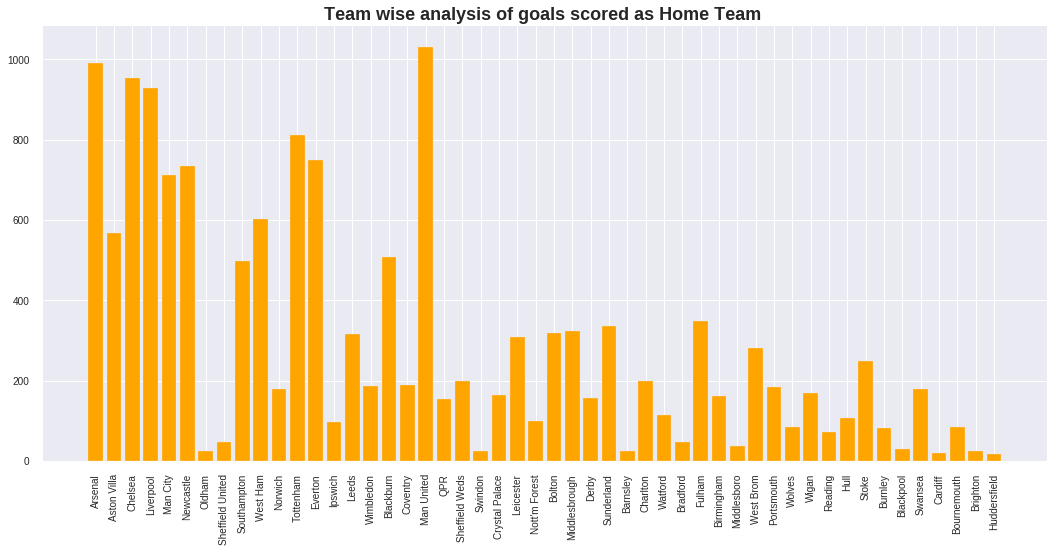

In [0]:
# To see the Team wise goals of each team
team_name = list(team_tot_goal.keys())
team_total_goal = list(team_tot_goal.values())
plt.figure(figsize=(18,8))
plt.bar(range(len(team_tot_goal)),team_total_goal,tick_label=team_name,color ='orange')
plt.title("Team wise analysis of goals scored as Home Team ",fontsize=18,fontweight="bold")
plt.xticks(rotation = 90)
plt.savefig('teamtotgoal.png')
plt.show()

- **Manchester United** scores the **highest total goal points** which is **1032 poins**.

- **Second is the Arsenal** which has the total goal poins **992**.

- **Third is the Chelsea** which has total goal poins **955**.

- **Least goal** obtained by **Huddersfield** which is **16 points**.

<a id=section50101></a>
## 5.7 What is the distribution of Goal points by Home Team?

1    3124
2    2356
0    2261
3    1176
4    497 
5    166 
6    53  
7    23  
8    6   
9    2   
Name: FTHG, dtype: int64

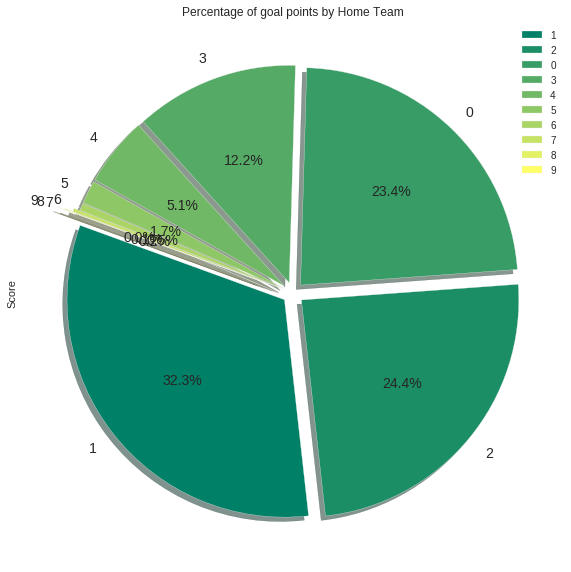

In [0]:
# To plot the percentage of Home Team goal
epl_data['FTHG'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.08,0.12,0.15], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(20,10), shadow=True, startangle=160, legend=True, cmap='summer')

plt.ylabel('Score')
plt.title('Percentage of goal points by Home Team')
epl_data['FTHG'].value_counts()

- From above pie chart we can infer

 - **Maximum number of goal points as 1** in **Full Time Home Goal** which is **32.3%**.
 - There is **two occurance of goal points as 9 by the Home Team** which is **0.02%** and this is the **maximum goal scored by a HomeTeam**.
 - **Goal point 2** has **24.4%**.
 - **Goal point 3** has **12.2%**.
 - **Goal point 4** has **5.1%**.
 - **Goal Point 5** has **1.7%**.
 - **Goal Point 6** has **0.5%**.
 - **Goal Point 7** has **0.23%**.
 - **Goal Point 8** has **0.06%**.
 - The Percentage that the **Home Team has not scored any points is 23.4%**.

<a id=section50101></a>
## 5.8 What is the distribution of Goal points by Away Team?

1    3366
0    3359
2    1804
3    791 
4    260 
5    57  
6    24  
7    2   
8    1   
Name: FTAG, dtype: int64

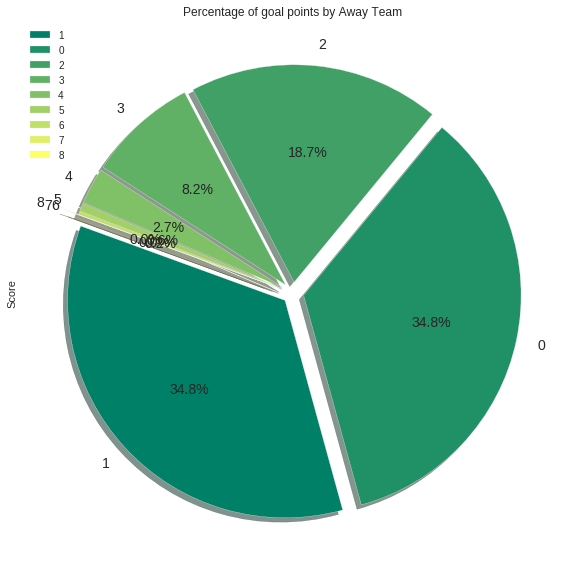

In [0]:

# To plot the percentage of Away Team goal
epl_data['FTAG'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.08,0.12], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(20,10), shadow=True, startangle=160, legend=True, cmap='summer')

plt.ylabel('Score')
plt.title('Percentage of goal points by Away Team')
epl_data['FTAG'].value_counts()

- From above pie chart we can infer

 - **Maximum number of goal points as 1** in **Full Time Home Goal** which is **34.8%**.
 - There is **one occurance of goal points as 8 by the Away Team** which is **0.01%** and this is the **maximum goal scored by an AwayTeam**.
 - **Goal point 2** has **18.7%**.
 - **Goal point 3** has **8.2%**.
 - **Goal point 4** has **2.7%**.
 - **Goal Point 5** has **0.6%**.
 - **Goal Point 6** has **0.2%**.
 - **Goal Point 7** has **0.02%**.
 - The percentage that the **Away Team has not scored any points is 34.8%**.

<a id=section50101></a>
# 6. Processing the Dataset to apply Machine Learning Algorithm

Replacing the __Object type value to numeric__ in the column __FTR__ inorder to apply classification algorithm.

- Replacing __H TO 1__.
- Replacing __A TO 2__.
- Replacing __D TO 3__.

Since the explanatory variables should be numeric, we are replacing the __Object type value to numeric__ in the column __HomeTeam__ and __AwayTeam__. 

In [0]:
epl_data = epl_data.replace(to_replace ='H', value ="1") 
epl_data = epl_data.replace(to_replace ='A', value ="2") 
epl_data = epl_data.replace(to_replace ='D', value ="3") 

epl_data = epl_data.replace(to_replace ="Arsenal", value ="1") 
epl_data = epl_data.replace(to_replace ="Aston Villa", value ="2") 
epl_data = epl_data.replace(to_replace ="Chelsea", value ="3") 
epl_data = epl_data.replace(to_replace ="Liverpool", value ="4") 
epl_data = epl_data.replace(to_replace ="Man City", value ="5") 
epl_data = epl_data.replace(to_replace ="Newcastle", value ="6") 
epl_data = epl_data.replace(to_replace ="Oldham", value ="7") 
epl_data = epl_data.replace(to_replace ="Sheffield United", value ="8") 
epl_data = epl_data.replace(to_replace ="Southampton", value ="9") 
epl_data = epl_data.replace(to_replace ="West Ham", value ="10") 
epl_data = epl_data.replace(to_replace ="Norwich", value ="11") 
epl_data = epl_data.replace(to_replace ="Tottenham", value ="12") 
epl_data = epl_data.replace(to_replace ="Everton", value ="13") 
epl_data = epl_data.replace(to_replace ="Ipswich", value ="14") 
epl_data = epl_data.replace(to_replace ="Leeds", value ="15") 
epl_data = epl_data.replace(to_replace ="Wimbledon", value ="16") 
epl_data = epl_data.replace(to_replace ="Blackburn", value ="17") 
epl_data = epl_data.replace(to_replace ="Coventry", value ="18") 
epl_data = epl_data.replace(to_replace ="Man United", value ="19") 
epl_data = epl_data.replace(to_replace ="QPR", value ="20") 
epl_data = epl_data.replace(to_replace ="Sheffield Weds", value ="21") 
epl_data = epl_data.replace(to_replace ="Swindon", value ="22") 
epl_data = epl_data.replace(to_replace ="Crystal Palace", value ="23") 
epl_data = epl_data.replace(to_replace ="Leicester", value ="24") 
epl_data = epl_data.replace(to_replace ="Nott'm Forest", value ="25") 
epl_data = epl_data.replace(to_replace ="Bolton", value ="26") 
epl_data = epl_data.replace(to_replace ="Middlesbrough", value ="27") 
epl_data = epl_data.replace(to_replace ="Derby", value ="28") 
epl_data = epl_data.replace(to_replace ="Sunderland", value ="29") 
epl_data = epl_data.replace(to_replace ="Barnsley", value ="30") 
epl_data = epl_data.replace(to_replace ="Charlton", value ="31") 
epl_data = epl_data.replace(to_replace ="Watford", value ="32") 
epl_data = epl_data.replace(to_replace ="Bradford", value ="33") 
epl_data = epl_data.replace(to_replace ="Fulham", value ="34") 
epl_data = epl_data.replace(to_replace ="Birmingham", value ="35") 
epl_data = epl_data.replace(to_replace ="Middlesboro", value ="36") 
epl_data = epl_data.replace(to_replace ="West Brom", value ="37") 
epl_data = epl_data.replace(to_replace ="Portsmouth", value ="38") 
epl_data = epl_data.replace(to_replace ="Wolves", value ="39") 
epl_data = epl_data.replace(to_replace ="Wigan", value ="40") 
epl_data = epl_data.replace(to_replace ="Reading", value ="41") 
epl_data = epl_data.replace(to_replace ="Hull", value ="42") 
epl_data = epl_data.replace(to_replace ="Stoke", value ="43") 
epl_data = epl_data.replace(to_replace ="Burnley", value ="44") 
epl_data = epl_data.replace(to_replace ="Blackpool", value ="45") 
epl_data = epl_data.replace(to_replace ="Swansea", value ="46") 
epl_data = epl_data.replace(to_replace ="Cardiff", value ="47") 
epl_data = epl_data.replace(to_replace ="Bournemouth", value ="48") 
epl_data = epl_data.replace(to_replace ="Brighton", value ="49") 
epl_data = epl_data.replace(to_replace ="Huddersfield", value ="50") 
epl_data

Date HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR   Season
0     14/08/93  1        18       0     3     2   0     0     3   1993-94
1     14/08/93  2        20       4     1     1   0     0     3   1993-94
2     14/08/93  3        17       1     2     2   0     0     3   1993-94
3     14/08/93  4        21       2     0     1   0     0     3   1993-94
4     14/08/93  5        15       1     1     3   0     0     3   1993-94
...        ... ..        ..      ..    ..    ..  ..    ..    ..       ...
9659  13/05/18  6        3        3     0     1   1     0     1   2017-18
9660  13/05/18  9        5        0     1     2   0     0     3   2017-18
9661  13/05/18  46       43       1     2     2   1     2     2   2017-18
9662  13/05/18  12       24       5     4     1   1     2     2   2017-18
9663  13/05/18  10       13       3     1     1   1     0     1   2017-18

[9664 rows x 10 columns]

- Copy the dataset to another dataset for processing the dataset variables

In [0]:
# Copying the dataset to another dataset for further processing
ml_epl = epl_data

In [0]:
ml_epl.head()

Date HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR   Season
0  14/08/93  1        18       0     3     2   0     0     3   1993-94
1  14/08/93  2        20       4     1     1   0     0     3   1993-94
2  14/08/93  3        17       1     2     2   0     0     3   1993-94
3  14/08/93  4        21       2     0     1   0     0     3   1993-94
4  14/08/93  5        15       1     1     3   0     0     3   1993-94

__Date__ and __Season__ column has no importance in predicting the winning of team. So, we are dropping this columns.

In [0]:
ml_epl.drop(['Date','Season'], axis = 1 ,inplace= True)

In [0]:
ml_epl.head()

HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR
0  1        18       0     3     2   0     0     3 
1  2        20       4     1     1   0     0     3 
2  3        17       1     2     2   0     0     3 
3  4        21       2     0     1   0     0     3 
4  5        15       1     1     3   0     0     3

In [0]:



ml_epl.describe(include = 'all')

HomeTeam AwayTeam         FTHG         FTAG   FTR         HTHG  \
count   9664     9664     9664.000000  9664.000000  9664  9664.000000   
unique  50       50      NaN          NaN           3    NaN            
top     19       19      NaN          NaN           1    NaN            
freq    479      479     NaN          NaN           4461 NaN            
mean    NaN      NaN      1.523903     1.121482     NaN   0.619930      
std     NaN      NaN      1.301671     1.121667     NaN   0.817953      
min     NaN      NaN      0.000000     0.000000     NaN   0.000000      
25%     NaN      NaN      1.000000     0.000000     NaN   0.000000      
50%     NaN      NaN      1.000000     1.000000     NaN   0.000000      
75%     NaN      NaN      2.000000     2.000000     NaN   1.000000      
max     NaN      NaN      9.000000     8.000000     NaN   5.000000      

               HTAG   HTR  
count   9664.000000  9664  
unique NaN           3     
top    NaN           3     
freq   NaN           4603  
mean    0.441743     NaN   
std     0.690798     NaN   
min     0.000000     NaN   
25%     0.000000     NaN   
50%     0.000000     NaN   
75%     1.000000     NaN   
max     5.000000     NaN

In [0]:
ml_epl.corr()              # To display the co-relation among the columns in the dataset

FTHG      FTAG      HTHG      HTAG
FTHG  1.000000 -0.036578  0.640662 -0.012032
FTAG -0.036578  1.000000 -0.030319  0.629783
HTHG  0.640662 -0.030319  1.000000  0.027751
HTAG -0.012032  0.629783  0.027751  1.000000

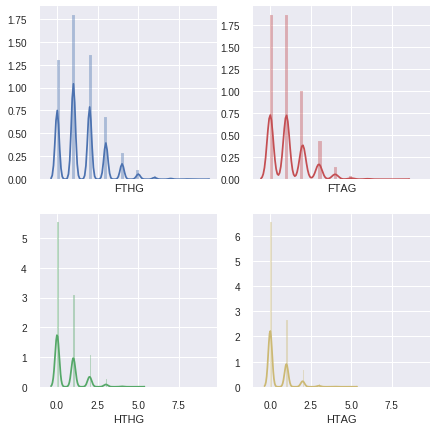

In [0]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(ml_epl.FTHG, color="b", ax=axes[0, 0])

sns.distplot(ml_epl.FTAG, color="r", ax=axes[0, 1])

sns.distplot(ml_epl.HTHG, color="g", ax=axes[1, 0])

sns.distplot(ml_epl.HTAG, color="y", ax=axes[1, 1])

- Dropping the column 'HTHG','HTAG' and 'HTR', since there is only little corelation in calculating 'FTR'.

In [0]:
ml_epl.drop(['HTHG','HTAG','HTR'], axis = 1 ,inplace= True)
ml_epl

HomeTeam AwayTeam  FTHG  FTAG FTR
0     1        18       0     3     2 
1     2        20       4     1     1 
2     3        17       1     2     2 
3     4        21       2     0     1 
4     5        15       1     1     3 
...  ..        ..      ..    ..    .. 
9659  6        3        3     0     1 
9660  9        5        0     1     2 
9661  46       43       1     2     2 
9662  12       24       5     4     1 
9663  10       13       3     1     1 

[9664 rows x 5 columns]

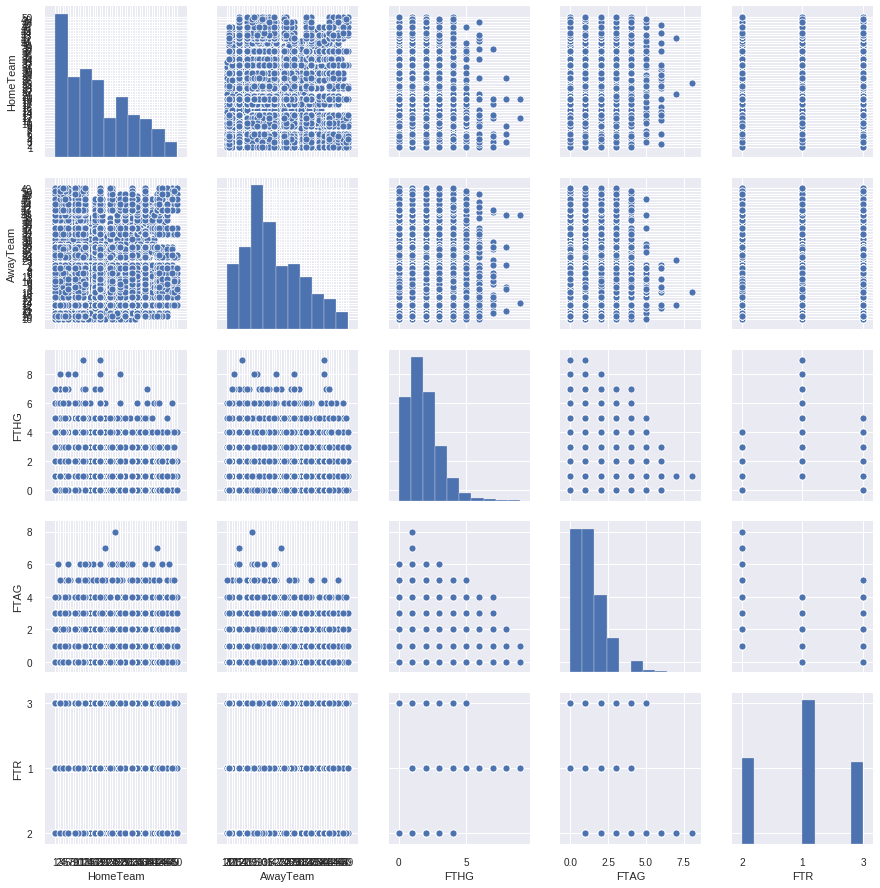

In [0]:
sns.pairplot(ml_epl)        # Plotting the data in our dataset

Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5, 1, 'Correlation between features')

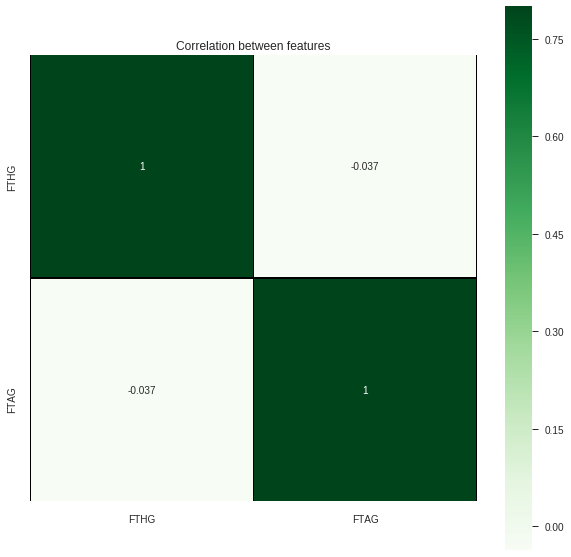

In [0]:
corr = ml_epl.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.02, square = True,annot = True,cmap="Greens",linecolor ='black')
plt.title('Correlation between features')

<a id=section402></a>
# 7. Preparing X and y using Pandas

In [0]:
feature_cols = ['HomeTeam','AwayTeam','FTHG', 'FTAG']                # create a Python list of feature names
X = ml_epl[feature_cols]    

In [0]:
print(type(X))                 # Diplays the data type of X
print(X.shape)                 # Displays the No.of columns and Rows in our dataset

<class 'pandas.core.frame.DataFrame'>
(9664, 4)


In [0]:
y = ml_epl.FTR                 # creating a variable to hold our Target Variable
y.head()


0    2
1    1
2    2
3    1
4    3
Name: FTR, dtype: object

In [0]:
y.shape

(9664,)

In [0]:
#scaling on X

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)                                                                          # fit the data to Standardscaler

Xs = sc.transform(X)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(Xs, columns=X.columns).head()) 

After standardizing our features, the first 5 rows of our data now look like this:

   HomeTeam  AwayTeam      FTHG      FTAG
0 -1.285587  0.007089 -1.170789  1.674842
1 -1.209547  0.159169  1.902343 -0.108310
2 -1.133508 -0.068950 -0.402506  0.783266
3 -1.057468  0.235209  0.365777 -0.999886
4 -0.981428 -0.221030 -0.402506 -0.108310


<a id=section402></a>
# 8. Splitting X and y into training and test datsets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.20, random_state=1)

In [0]:
print(X_train.shape)
print(y_train.shape)

(7731, 4)
(7731,)


<a id=section402></a>
# 9. LOGISTIC REGRESSION

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<a id=section402></a>
## 9.1 Using the model for prediction

In [0]:
# Make predictions on the traininging set
y_pred_train = logreg.predict(X_train)

# Make predictions on the testing set
y_pred_test = logreg.predict(X_test)    

In [0]:
#this is where we can change prob threshold
y_pred_prob_test = logreg.predict_proba(X_test)  
y_pred_prob_test

array([[3.43360312e-10, 7.24143926e-01, 2.75856073e-01],
       [9.09843584e-01, 7.56936625e-06, 9.01488468e-02],
       [8.71541830e-01, 9.10246202e-13, 1.28458170e-01],
       ...,
       [7.38823487e-01, 3.96997388e-06, 2.61172543e-01],
       [1.94627556e-06, 7.90894847e-01, 2.09103207e-01],
       [8.33344089e-01, 6.03178915e-06, 1.66649879e-01]])

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id=section402></a>
## 9.2 Model Evaluation

### 9.2.1 Model Evaluation using __accuracy score__

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
logit_accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy score for the Logistic model:', logit_accuracy)


Accuracy score for train data is: 0.9998706506273445
Accuracy score for the Logistic model: 1.0


### 9.2.2 Model Evaluation using __confusion matrix__

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

     0    1    2
0  913  0    0  
1  0    508  0  
2  0    0    512


This means 913 + 508 + 512 = __1933 correct predictions__ & there is __No False Predictions__

<a id=section402></a>
# 10. DECISION TREE

In [0]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

- __Plotting our model of decision tree__

In [0]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython

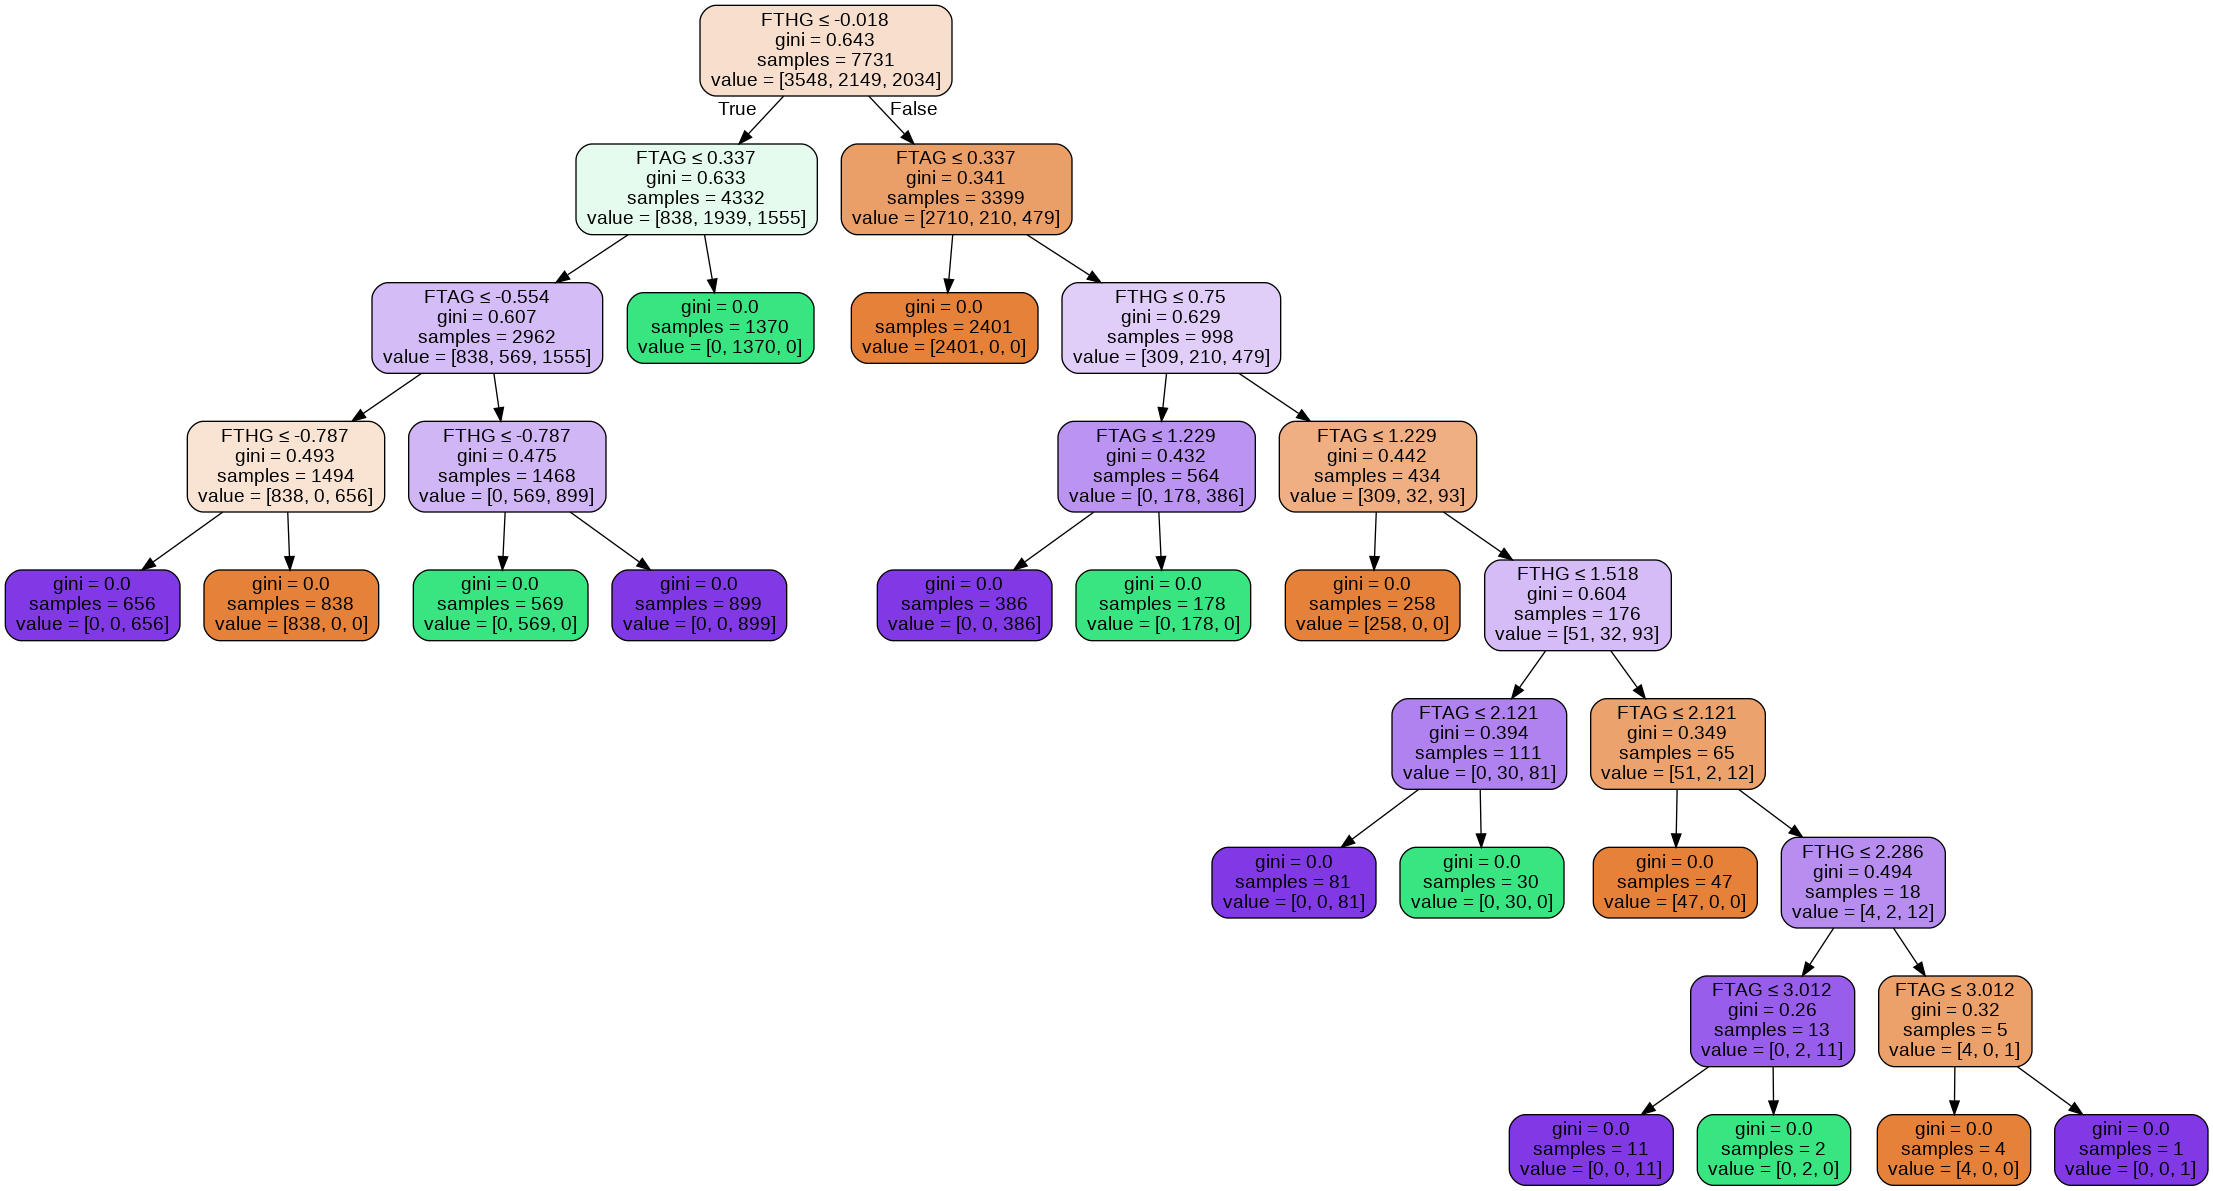

In [0]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())

<a id=section402></a>
## 10.1 Using the model for Prediction

In [0]:
DT_y_pred_train = model.predict(X_train)            # Makes prediction on thetraining set

In [0]:
DT_y_pred_test = model.predict(X_test)              # Makes predictions on the testing set                                          

<a id=section402></a>
## 10.2 Model Evaluation

<a id=section402></a>
### 10.2.1 Model Evaluation using __Accuracy score__

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,DT_y_pred_train))
dt_accuracy = accuracy_score(y_test,DT_y_pred_test)
print('Accuracy score for the Decision Tree model:', dt_accuracy)

Accuracy score for train data is: 1.0
Accuracy score for the Decision Tree model: 1.0


<a id=section402></a>
### 10.2.2 Model Evaluation using __Confusion Matrix__

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, DT_y_pred_test))

print(confusion_matrix)

     0    1    2
0  913  0    0  
1  0    508  0  
2  0    0    512


This means 913 + 508 + 512 = __1933 correct predictions__  __0 false predictions__.

<a id=section402></a>
# 11. RANDOM FOREST

- __Model without parameter specification__

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

- __Model with parameters specified__

In [0]:
model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

##11.1 Using the Model for Prediction

In [0]:
# Makes predictions on the training set
RF_y_pred_train = model.predict(X_train)
RF_y_pred_train1 = model1.predict(X_train)

In [0]:
# Makes predictions on the testing set
RF_y_pred_test = model.predict(X_test)                                          
RF_y_pred_test1 = model1.predict(X_test)

## 11.2 Model evaluation 

### 11.2.1 Model Evaluation using __Accuracy score__

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,RF_y_pred_test))
rf_accuracy = accuracy_score(y_test,RF_y_pred_test)
print('Accuracy score for the Random Forest model with parameters sepcified-1:', rf_accuracy)
rf_accuracy1 = accuracy_score(y_test,RF_y_pred_test1)
print('Accuracy score for the Random Forest model with parameters sepcified-2:', rf_accuracy1)

Accuracy score for test data using the model without parameter specification: 0.999482669425763
Accuracy score for the Random Forest model with parameters sepcified-1: 0.999482669425763
Accuracy score for the Random Forest model with parameters sepcified-2: 1.0


You can see that the accuracy has __improved__ when we have altered the default parameters.

### 11.2.2 Model Evaluation using __Confusion Matrix__

- __Confusion matrix__ for the prediction by the random forest classifier __without parameter specification__. 

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, RF_y_pred_test))

print(confusion_matrix)

     0    1    2
0  913  0    0  
1  0    507  1  
2  0    0    512


This means 913 + 507 + 512 = __1932 correct predictions__ & __1 false prediction__.

- __Confusion matrix__ for the prediction by the random forest classifier when the __parameters are specified__. 

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, RF_y_pred_test1))

print(confusion_matrix)

     0    1    2
0  913  0    0  
1  0    508  0  
2  0    0    512


This means 913 + 508 + 512 = __1933 correct predictions__ & __0 false prediction__.

 Observe that the number of correct prediction have __increased__ compared to our model where the default parameters are used.<br/>
 Now, we will see a way to automatically find the best parameters. 

# 12. Random forest with RandomizedsearchCV

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [0]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=Non

## 12.1 Using the Model for Prediction

In [0]:
# Makes predictions on the test set
RAN_y_pred_test1 = random_search.predict(X_test)
RAN_y_pred_test1

array(['2', '1', '1', ..., '1', '2', '1'], dtype=object)

## 12.2 Model evaluation 

### 12.2.1 Model Evaluation using __accuracy_score__

In [0]:
from sklearn.metrics import accuracy_score
ran_accuracy = accuracy_score(y_test,RAN_y_pred_test1)
print('Accuracy score on test data with RandomizedSearchCV is:', ran_accuracy)


Accuracy score on test data with RandomizedSearchCV is: 0.992240041386446


### 12.2.2 Model Evaluation using __Confusion Matrix__

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, RAN_y_pred_test1))

print(confusion_matrix)

     0    1    2
0  913  0    0  
1  2    503  3  
2  10   0    502


You can see 913 + 503 + 502 = __1918 correct predictions__ & 3 + 12 = __15 false predictions__.

__Observations:__

- With __RandomizedSearchCV__ *accuracy_score* __decreased__ from __0.9994__ to __0.9922__ and the __number of correct predictions decreased to 1918__ and number of false predictions __increased to 15__. 

# 13. Model comparison using accuracy score

In [0]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'Decission Tree','Random Forest','Random Forest - Randomised search'],
        'Accuracy_score' : [logit_accuracy, dt_accuracy,rf_accuracy,ran_accuracy]
    })
models.sort_values(by='Accuracy_score', ascending=False)

Model  Accuracy_score
0  Logistic Regression                1.000000      
1  Decission Tree                     1.000000      
2  Random Forest                      0.999483      
3  Random Forest - Randomised search  0.992240

# 14. Conclusion

- From the accuracy score for all the classification algorithms, the Random forest algorithm using Randomised search is better compared to others.

- Thus, the final result of the European Premier League can be predicted using the Random forest Randomised Search algorithm.